<a href="https://colab.research.google.com/github/khaledhassann/QR-Code-Reader/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow

# Trail



In [ ]:
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gs_img)


NameError: name 'img' is not defined

In [ ]:
# Apply Gaussian blur to reduce noise
#blurred = cv2.GaussianBlur(gs_img, (5, 5), 0)
#cv2_imshow(blurred)

In [ ]:
# Thresholding
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [ ]:
# Apply Canny edge detection
edges = cv2.Canny(thresh, 50, 150)
cv2_imshow(edges)

In [ ]:
# Apply hough transfrom and fill the inside of the othline black
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=100)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

In [ ]:
# # Apply Gaussian blur to reduce noise
# blurred_2 = cv2.GaussianBlur(mask, (19, 19), 0)
# cv2_imshow(blurred_2)

In [ ]:
# # Apply Canny edge detection
# edges_2 = cv2.Canny(blurred_2, 50, 150)
# cv2_imshow(edges_2)

In [ ]:
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours to find hexagons (6 sides) with maximum perimeter
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) :  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)
#cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
#print(len(contours))
# Display the original image with detected edges
cv2_imshow(img)

In [ ]:
import cv2

# Load the image
image = cv2.imread('/content/14-BANANAAA!!!.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# Approximate polygonal curves
approx_contours = [cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True) for cnt in contours]

# Find bounding boxes
bounding_boxes = [cv2.boundingRect(cnt) for cnt in approx_contours]

# Filter bounding boxes based on aspect ratio and area
filtered_boxes = [box for box in bounding_boxes if 0.9 < box[2] / box[3] < 1.1 and cv2.contourArea(approx_contours[bounding_boxes.index(box)]) > 100]

# Draw the outer frame
for box in filtered_boxes:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Trial 2

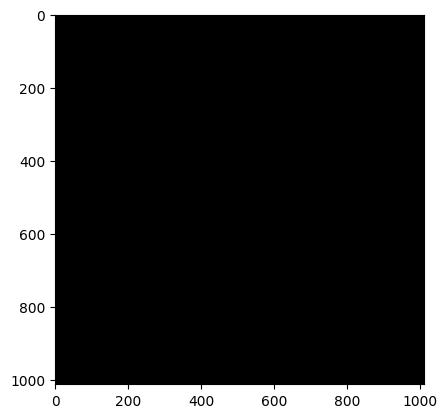

In [42]:
def isLocator(curr_integral, last_3_integrals):

  if len(last_3_integrals)<2:
    last_3_integrals.append(curr_integral)
    return False

  elif len(last_3_integrals)<3:
    last_3_integrals.append(curr_integral)

  else:
    last_3_integrals.pop(0)
    last_3_integrals.append(curr_integral)


  f,s,t = last_3_integrals[:3]
  if (abs(s-t) < 5) and (abs(f-3*s) < 6):
    return True
  else:
    return False





# Load the image
img = cv2.imread('./images/04-Black-mirror.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)

# Create a black mask image
integral = np.zeros_like(img)




# finding the image integral
h, w = thresh.shape[:2]
state = thresh[0][0]
count = 0
last_3_integrals = []
for i in range(h):

  for j in range(w):

    if thresh[i][j] == state:
      count += 1
    else:
      state = 0 if state == 255 else 255
      #integral[i][j] = count
      if isLocator(count, last_3_integrals):
        newJ = int(j-3.5*count)
        integral[i][newJ] += 127
      count = 0

for j in range(w):

  for i in range(h):

    if thresh[i][j] == state:
      count += 1
    else:
      state = 0 if state == 255 else 255
      #integral[i][j] = count
      if isLocator(count, last_3_integrals):
        newI = int(i-3.5*count)
        integral[newI][j] += 127
        if(integral[newI][j] > 200):
          print('hit')
      count = 0

plt.imshow(integral, cmap='gray')

In [ ]:
lines = cv2.HoughLinesP(integral, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/hough.cpp:485: error: (-215:Assertion failed) image.type() == CV_8UC1 in function 'HoughLinesProbabilistic'


# Testcase 1 (Normal)

In [453]:
img = cv2.imread('images/01-Getting-started.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(thresh, 50, 150)

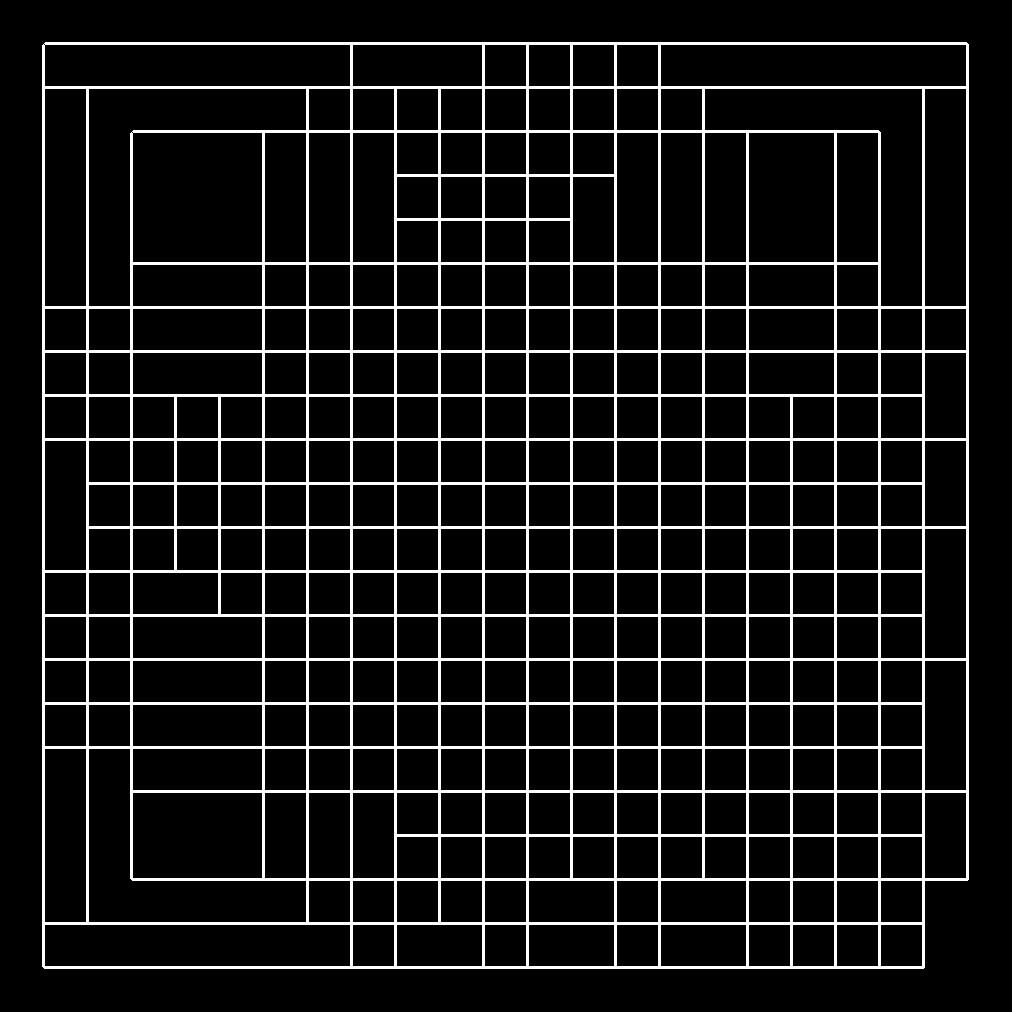

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

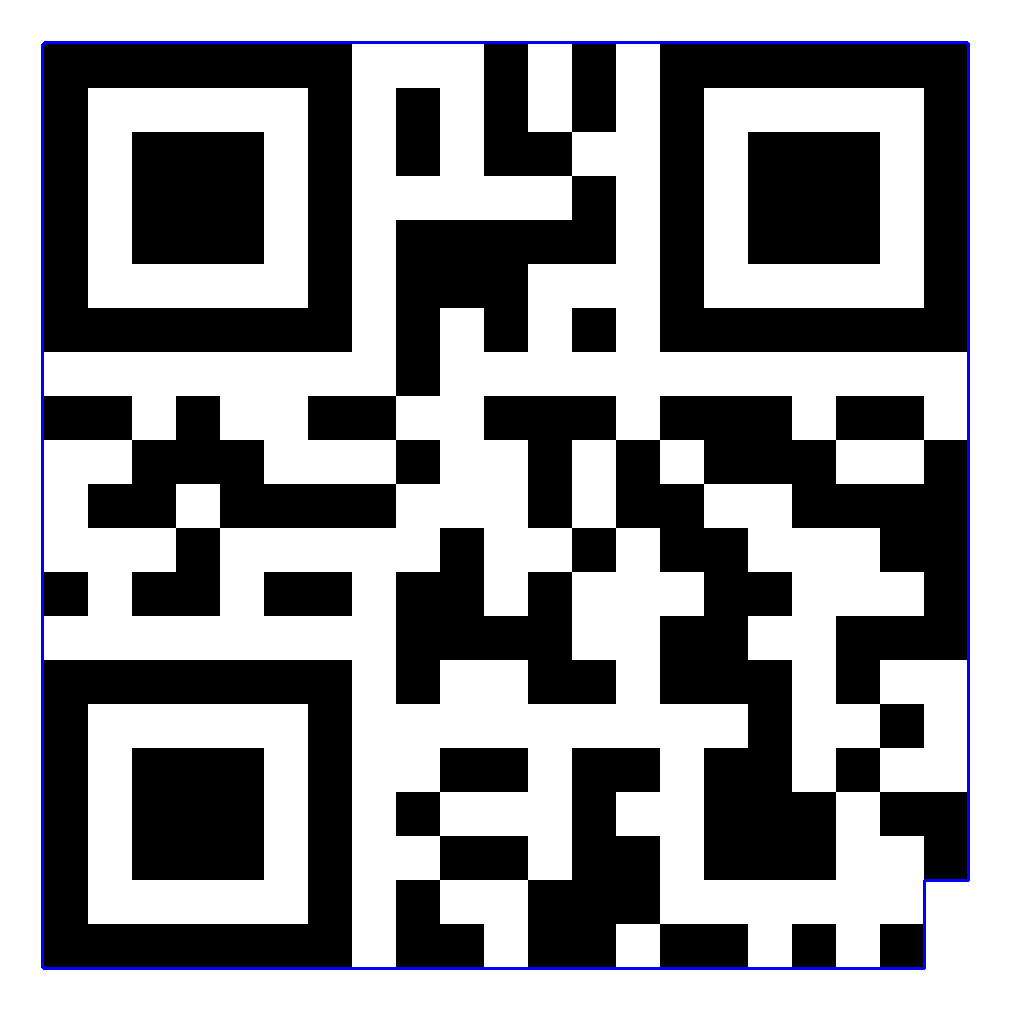

In [ ]:
# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)

cv2_imshow(img)

# Testcase 2 (Shifted)

In [ ]:
img = cv2.imread('/content/02-Matsawar-3edel-ya3am.png')

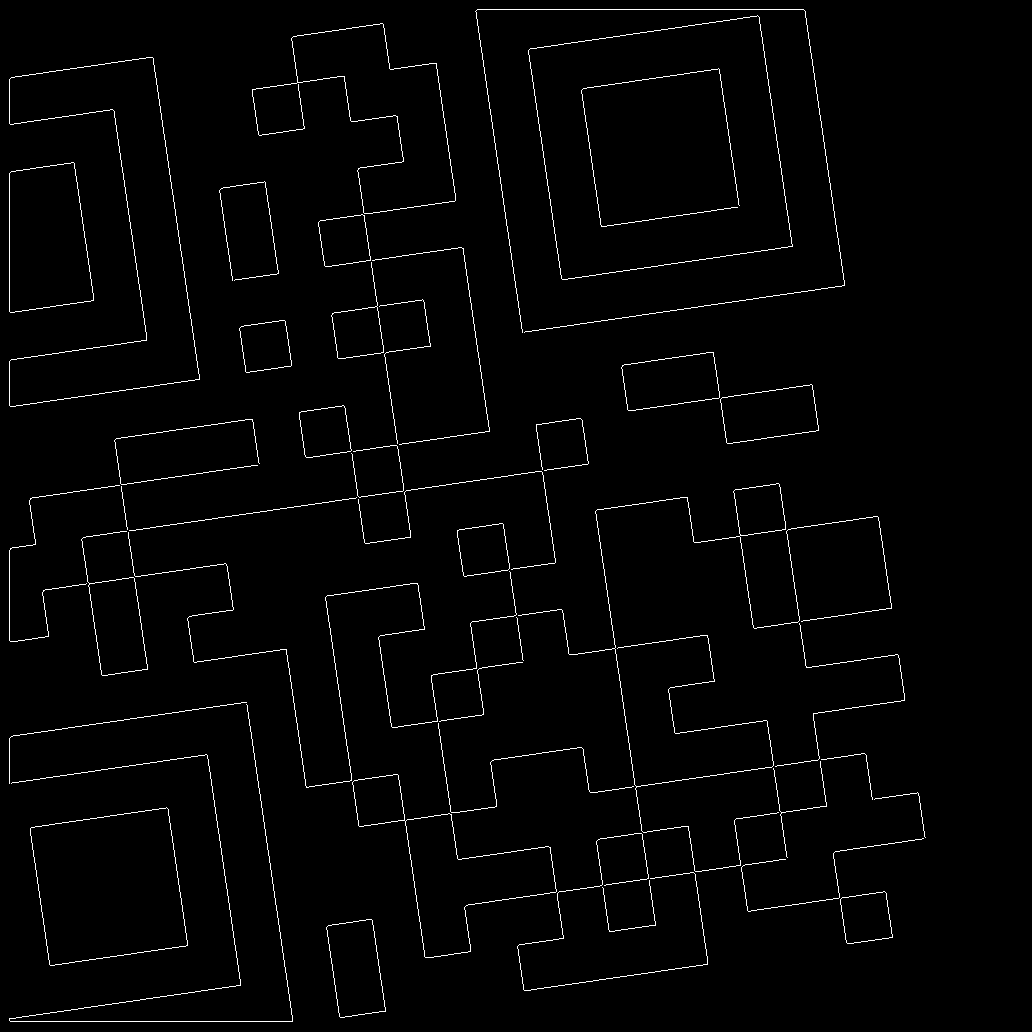

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)

# Add padding so we can draw complete lines in the hough transform
padding = 10
padded_thresh = cv2.copyMakeBorder(thresh, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=255)
padded_edges = cv2.Canny(padded_thresh, 50, 150)
cv2_imshow(padded_edges)

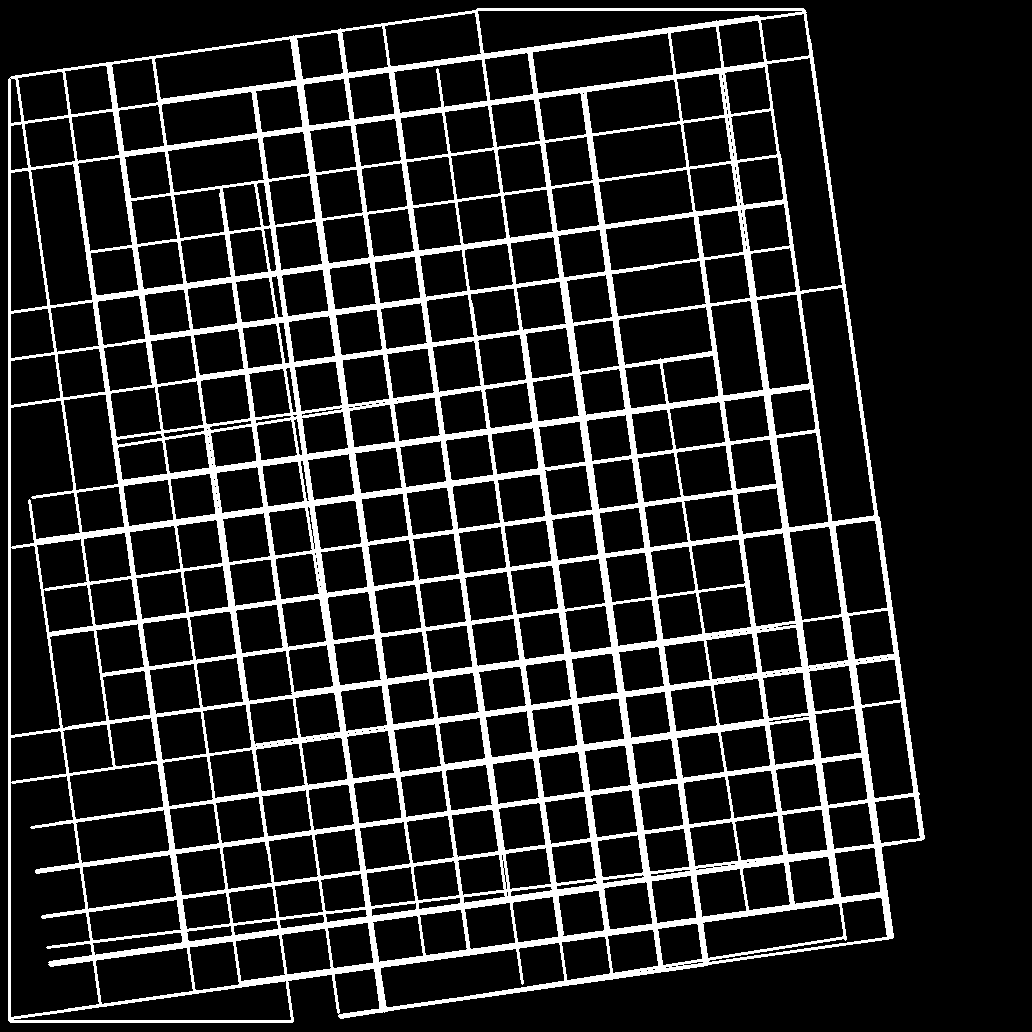

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(padded_edges, 1, np.pi / 180, threshold=35, minLineLength=250, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(padded_edges)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

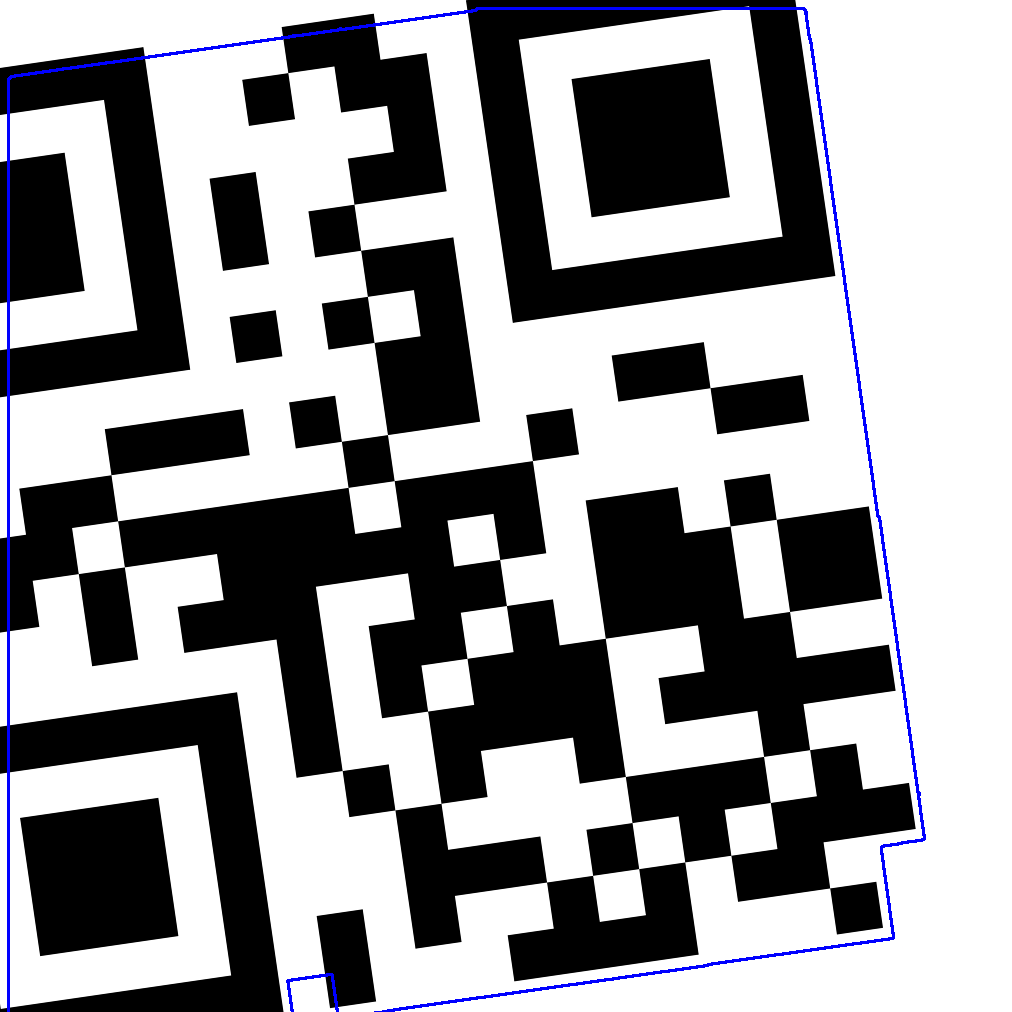

In [ ]:
# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx):  # Filter squares
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour
            # Draw the approximated contour in green
            #cv2.polylines(img, [approx], isClosed=True, color=(0, 255, 0), thickness=2)

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)


cv2_imshow(img)

# Testcase 3 (Upside-down)

In [ ]:
img = cv2.imread('/content/03-Leffy-bina-ya-donya.png')

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(thresh, 50, 150)

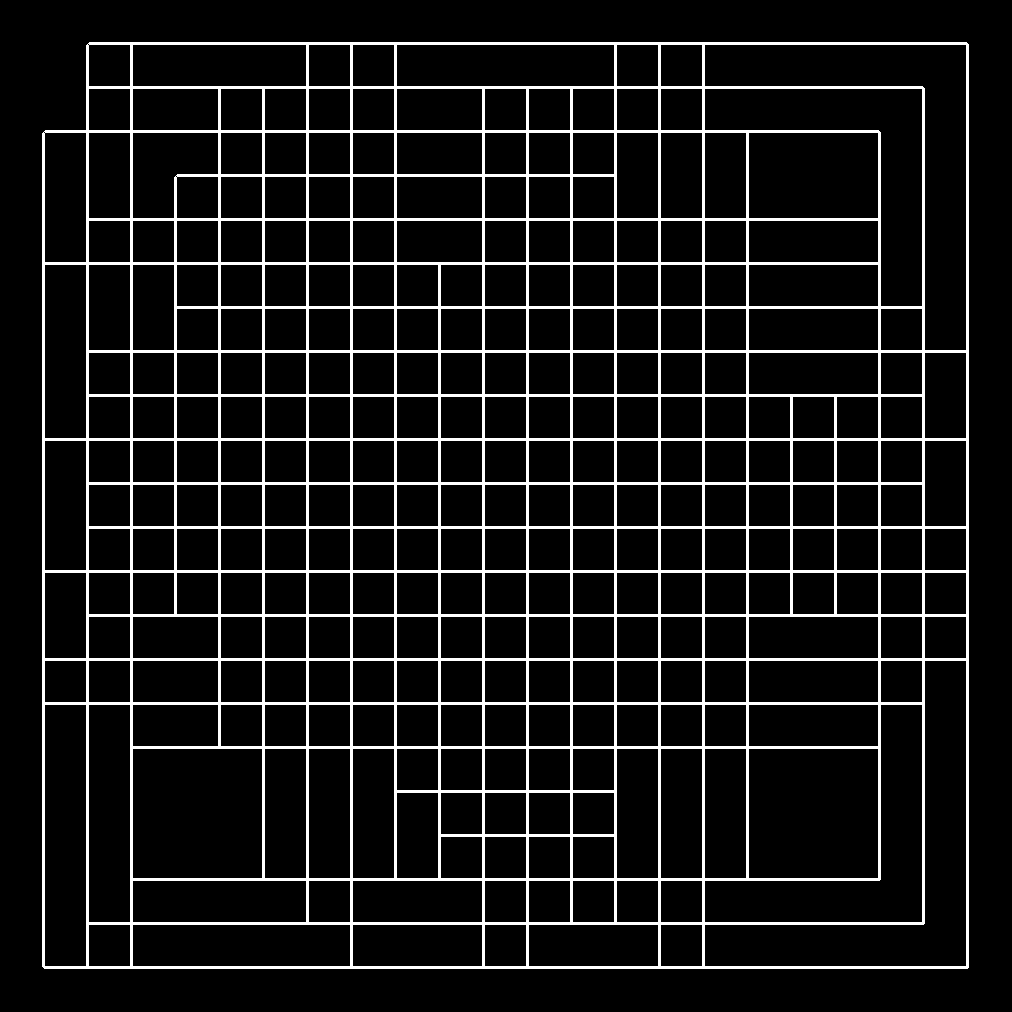

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

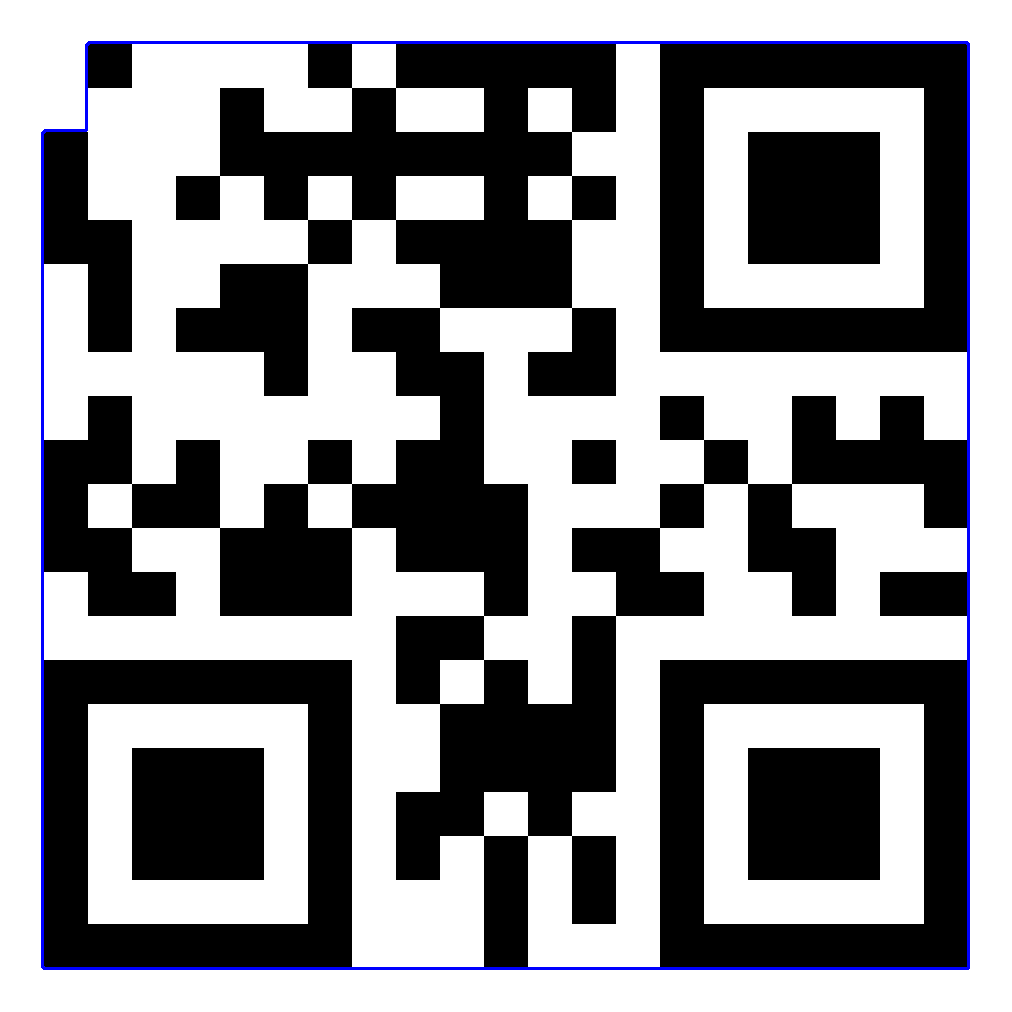

In [ ]:
# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)

cv2_imshow(img)

# Testcase 4 (Inverted)

# Testcase 5 (Caesear cipher)

Apply a correction algorithm 

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


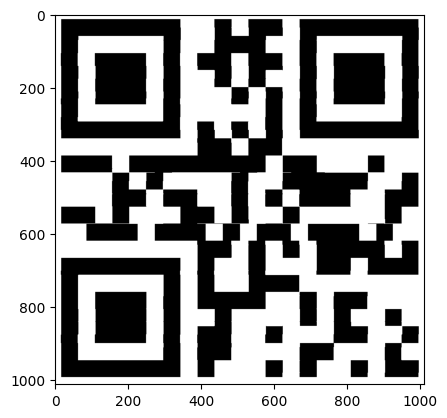

In [11]:
#define tolerance
t = 30

# load a grayscale image
img = cv2.imread('./images/05-Caesar-cipher.png', cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)
mask = np.full((img.shape[0], img.shape[1]), 255)
h, w = img.shape[:2]

first_from_left = 0
first_from_right = 0
# find first black pixel from the left
b = False
for i in range(h):
  if b :
    break
  for j in range(w):
    if img[i, j] == 0:
      first_from_left = j
      b = True
      break
  

# find first black pixel from the right 
b = False
for i in range(h):
  if b :
    break
  for j in range(w-1, 0, -1):
    if img[i, j] == 0:
      first_from_right = j
      b = True
      break
  

# calculate the left and right refrences
qr_width = first_from_right-first_from_left
left_ref = int((w-qr_width)/2)
right_ref = left_ref+qr_width

#print(f"sss: {first_from_left} {first_from_right}")

# apply correction to each row
for i in range(h):

  found_black_pixel = False

  # find left and right boundaries
  l_ptr = 0
  r_ptr = w-1

  while (img[i, l_ptr] == 255 or img[i, r_ptr] == 255) and (l_ptr < r_ptr):
    if img[i, l_ptr] == 255:
      l_ptr += 1
    else:
      found_black_pixel = True

    if img[i, r_ptr] == 255:
      r_ptr -= 1
    else:
      found_black_pixel = True

  #print(l_ptr)


  # correct if cross left refrence

  if (l_ptr<left_ref ) and found_black_pixel:
    shift_amount = left_ref - l_ptr
    # Shift row to the right -->
    mask[i][l_ptr+shift_amount:r_ptr+shift_amount] = img[i][l_ptr:r_ptr]

  elif (right_ref-r_ptr < t) and found_black_pixel:
    shift_amount = right_ref-r_ptr
    # Shift row to the right -->
    mask[i][l_ptr+shift_amount:r_ptr+shift_amount] = img[i][l_ptr:r_ptr]

  elif (r_ptr>right_ref ) and found_black_pixel:
    shift_amount = r_ptr - right_ref
    # Shift row to the left <--
    mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]

  elif (l_ptr-left_ref < t ) and found_black_pixel:
    shift_amount = l_ptr-left_ref
    # Shift row to the left <--
    mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]
  
  else:
    # Center the row
    center_of_the_row = int((r_ptr + l_ptr)/2)
    center_refrence = int((right_ref + left_ref)/2) 
    shift_amount = center_of_the_row - center_refrence
    mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]


#plt.imshow(img, cmap='gray')
print(mask)
plt.imshow(mask, cmap='gray')


# Testcase 6 (Rohmbus, Railfence cipher)

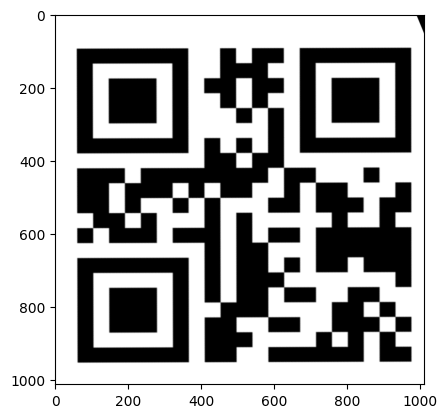

In [66]:
img = cv2.imread('./images/06-Railfence-cipher.png', cv2.IMREAD_GRAYSCALE)

# Initialize a mask to draw contour on
contour_mask = np.zeros_like(img)
# Initialize a mask to draw Hough lines on
hough_mask = np.zeros_like(img)

# Apply edge detection
edges = cv2.Canny(img, 50, 150)

# Apply Hough
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=100)
# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(hough_mask, (x1, y1), (x2, y2), (255, 255, 255), 2)

# Find contours
contours, _ = cv2.findContours(hough_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours to find polygons (4 sides) with maximum area
max_area = 0
selected_contour = None
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.1 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Check if the polygon has 4 vertices
    if len(approx) == 4:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)
        if area > max_area:
            max_area = area
            selected_contour = approx
cv2.drawContours(contour_mask, [selected_contour], -1, (255, 255, 255), 2)

# Get the edge vertices of the contour
bottom_left, top_left, top_right, bottom_right = selected_contour.reshape(-1, 2)
original_verticies = np.array([bottom_left, top_left, top_right, bottom_right], dtype= np.float32)

# Calculate new edge vertices positions
top_left = [top_right[0], bottom_left[1]]
bottom_right = [bottom_left[0], top_right[1]]
target_verticies = np.array([bottom_left, top_left, top_right, bottom_right], dtype= np.float32)

# Apply prespective 
perspective_transform_matrix = cv2.getPerspectiveTransform(original_verticies, target_verticies)
warped_image = cv2.warpPerspective(img, perspective_transform_matrix, (img.shape[1], img.shape[0]))
plt.imshow(warped_image, cmap='gray')


# Testcase 7 (Finger)

# Testcase 8 (Bahtana)

# Testcase 9 (Ink smudge)

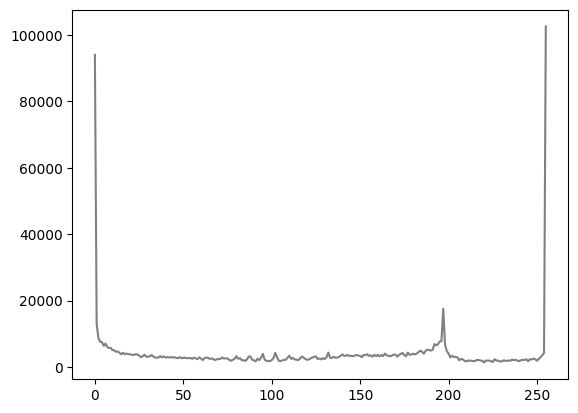

In [287]:
img = cv2.imread('./images/09-My-phone-fell-while-taking-this-one-...-or-did-it.png', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0,256])

# Plot the histogram
plt.plot(hist, color='gray')

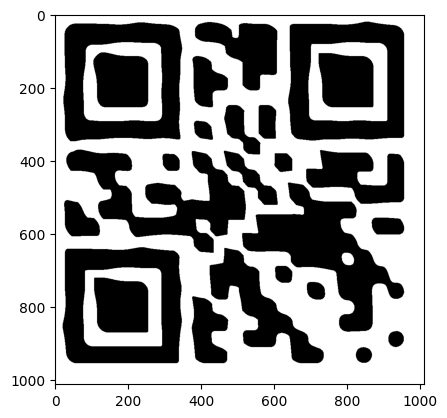

In [404]:
# Define the size of the shift
shift_size = 3

# Create the opposite shift filter
kernel = np.eye(shift_size, dtype=np.float32)  # Identity matrix
kernel = np.flip(kernel, axis=0)
kernel /= shift_size

filter = np.array([
    [0,0,1],
    [0,0,0],
    [1,0,0]
], np.float32)
filter /= 2
# Apply the opposite shift filter
restored_image = cv2.filter2D(img, -1, filter)

ret, thresholded_spectrum = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)


plt.imshow(thresholded_spectrum, cmap='gray')

In [ ]:
# Compute fourier tranform of the image 
f_transform = np.fft.fft2(img)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = np.log(np.abs(f_transform_shifted + 500))

# From the fourier transform we can see that the point spread 

# Create a circular low-pass filter
kernel_size = 1012
r = 1
kernel = np.ones((kernel_size, kernel_size), np.uint8)
cv2.circle(kernel, (kernel_size//2, kernel_size//2), r, 0, -1)


# Multiply the kernel by the FT of the image
filtered_transform = f_transform_shifted * kernel
magnitude_spectrum_filtered = np.log(np.abs(filtered_transform + 1))

# Do inverse fourier transform
fft_ifft_shift = np.fft.ifftshift(filtered_transform)
imageThen = np.fft.ifft2(fft_ifft_shift)
imageThen = np.abs(imageThen)
#plt.imshow(imageThen, cmap='gray')

# Apply thresholding
# ret, thresholded_spectrum = cv2.threshold(imageThen, 100, 255, cv2.THRESH_BINARY)
plt.imshow(imageThen, cmap='gray')


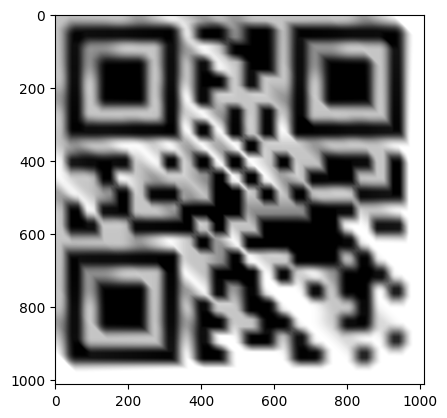

In [192]:
# Trying morphological operations

inv_img = 255-img

# Create a kernel
kernel = np.ones((17, 17), np.uint8)

# Apply morphological opening
morphed_img = cv2.morphologyEx(inv_img, cv2.MORPH_OPEN, kernel)

processed_img = 255 - morphed_img

plt.imshow(processed_img, cmap='gray')


In [ ]:
# image

# Intialize the kernel 
kernel_size = 3
kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    kernel[i, i] = 1/(kernel_size**2)
# kernel /= np.sum(kernel)

# Pad the kernel to match the size of the blurred image
padded_kernel = np.zeros_like(img, dtype=np.float64)
kernel_height, kernel_width = kernel.shape
padded_kernel[:kernel_height, :kernel_width] = kernel

# FT of the kernel
ft_kernel = np.fft.fft2(padded_kernel)
# ft_shift_kernel = np.fft.fftshift(ft_kernel)
# magnitude_spectrum_kernel = np.log(np.abs(ft_shift_kernel + 500))

# FT of the image
ft_image = np.fft.fft2(img)
# ft_shift_img = np.fft.fftshift(ft_image)
# magnitude_spectrum_img = np.log(np.abs(ft_shift_img + 500))

# Apply Wiener deconvolution
epsilon = 1e-8  # Small constant to avoid division by zero
wiener_filter = np.conj(ft_kernel) / (np.abs(ft_kernel)**2 + epsilon)
restored_image_fft = ft_image * wiener_filter
restored_image = np.fft.ifft2(restored_image_fft).real

# # Find the IFT of the output
# ft_res = np.fft.ifftshift(ft_shift_res)
# imageThen = np.fft.ifft2(ft_res)
# imageThen = np.abs(imageThen)

# Clip the values to [0, 255] and convert to uint8
restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)

# # Apply thresholding
# ret, thresholded_spectrum = cv2.threshold(restored_image, 250, 255, cv2.THRESH_BINARY)

plt.imshow(restored_image, cmap='gray')


In [ ]:
# Trying the effect of a diagonal averaging kernel 
kernel_size = 21
kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    kernel[i, i] = 1/kernel_size**2
i = cv2.imread('./images/01-Getting-started.png', cv2.IMREAD_GRAYSCALE)
res = cv2.filter2D(i, -1, kernel) # Has a similar effect to testcase 9
#plt.imshow(res, cmap='gray')

# Getting the ft
ft_image = np.fft.fft2(res)
ft_shift_img = np.fft.fftshift(ft_image)
magnitude_spectrum_img = np.log(np.abs(ft_shift_img + 500 )) # Has a similar ft to testcase 9
plt.imshow(magnitude_spectrum_img, cmap='gray')

In [ ]:
# Trying weiner using my own blurred image to see if it works

# Load the blurred image and the kernel
blurred_image = res
kernel = kernel
#kernel = np.zeros((17, 17), dtype=np.float64) / 17**2  # Define the kernel (assuming it's an averaging filter)

# Pad the kernel to match the size of the blurred image
padded_kernel = np.zeros_like(blurred_image, dtype=np.float64)
kernel_height, kernel_width = kernel.shape
padded_kernel[:kernel_height, :kernel_width] = kernel

# Compute the Fourier Transforms of the blurred image and the padded kernel
blurred_image_fft = np.fft.fft2(blurred_image)
padded_kernel_fft = np.fft.fft2(padded_kernel)

# Apply Wiener deconvolution
epsilon = 1e-8  # Small constant to avoid division by zero
wiener_filter = np.conj(padded_kernel_fft) / (np.abs(padded_kernel_fft)**2 + epsilon)
restored_image_fft = blurred_image_fft * wiener_filter
restored_image = np.fft.ifft2(restored_image_fft).real

# Clip the values to [0, 255] and convert to uint8
restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)
plt.imshow(restored_image, cmap='gray')


In [ ]:
# Trying weiner from scikit-image library
from skimage import restoration

# Intialize the kernel 
kernel_size = 19
kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    kernel[i, i] = 1/(kernel_size**2)

deconvolved, _ = restoration.unsupervised_wiener(img, kernel)
plt.imshow(deconvolved, cmap='gray')

# Testcase 10 (Grey photo)

# Testcase 11 (Vertical bar)

In [148]:
image = cv2.imread('./images/11-weewooweewooweewoo.png', cv2.IMREAD_GRAYSCALE)

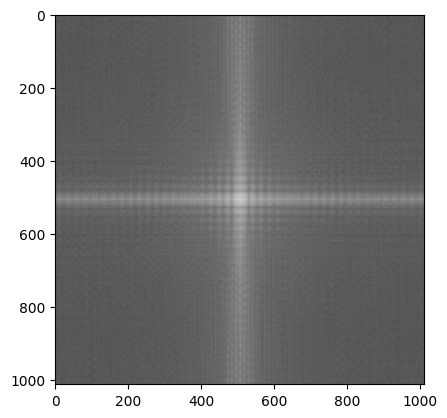

In [149]:
# Compute fourier tranform of the image 
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# # View transform and zoom on the middle
# magnitude_spectrum =  np.log(np.abs(f_transform_shifted) + 100)
# plt.imshow(magnitude_spectrum, cmap='gray')

# Create a filter to remove sinusoidal noise of frequency 11
mask = np.ones_like(image)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask[crow][ccol-11] = 0
mask[crow][ccol+11] = 0
# mask[crow][ccol-12] = 0
# mask[crow][ccol+12] = 0


# Apply the filter mask
f_transform_shifted_filtered = f_transform_shifted * mask

# # View transform and zoom on the middle
# magnitude_spectrum_filtered =  np.log(np.abs(f_transform_shifted_filtered) + 100)
# plt.imshow(magnitude_spectrum_filtered, cmap='gray')

# Do inverse fourier transform
fft_ifft_shift = np.fft.ifftshift(f_transform_shifted_filtered)
imageThen = np.fft.ifft2(fft_ifft_shift)
imageThen = np.abs(imageThen)
#plt.imshow(imageThen, cmap='gray')

# Apply thresholding
ret, thresholded_spectrum = cv2.threshold(imageThen, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_spectrum, cmap='gray')

# Testcase 12 (Noisy)

# Testcase 13 (Black photo)

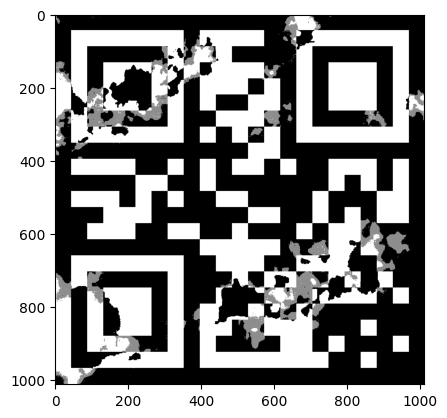

In [427]:
img = cv2.imread('./images/13-2el-noor-2ata3.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equlaized_image = cv2.equalizeHist(img)

#plt.imshow(equlaized_image, cmap='gray')

# Calculate the new histogram
hist, bins = np.histogram(equlaized_image.flatten(), 256, [0,256])

# Find peaks
peaks = np.where((hist[:-2] < hist[1:-1]) & (hist[1:-1] > hist[2:]))[0]

#print(peaks) # 216 and 237

# Change pixels with value 216 to 255
mod_img = np.zeros_like(equlaized_image)
h,w = equlaized_image.shape
for i in range(h):
    for j in range(w):
        




# Testcase 14 (Banana)

In [ ]:
img = cv2.imread('/content/14-BANANAAA!!!.png')

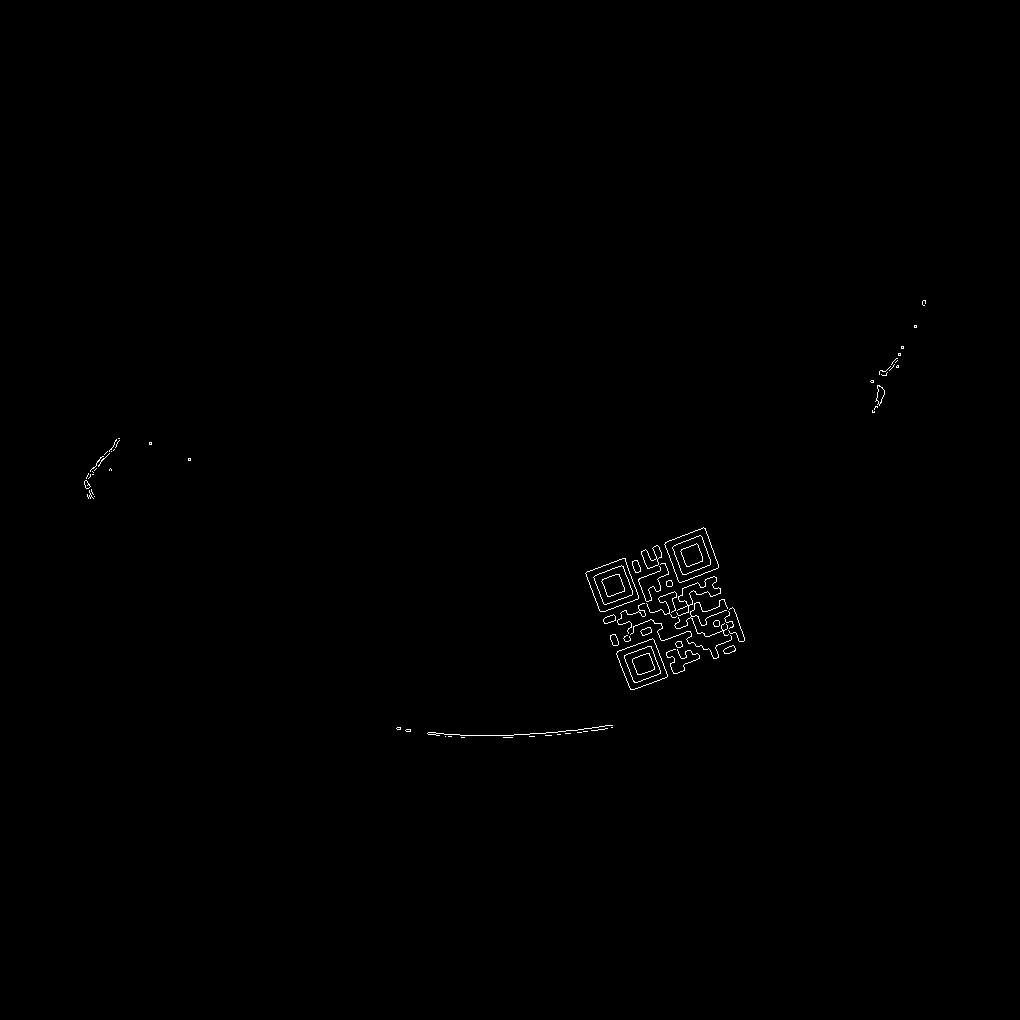

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)

# Add padding so we can draw complete lines in the hough transform
padding = 10
padded_thresh = cv2.copyMakeBorder(thresh, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=255)
padded_edges = cv2.Canny(padded_thresh, 50, 150)
cv2_imshow(padded_edges)

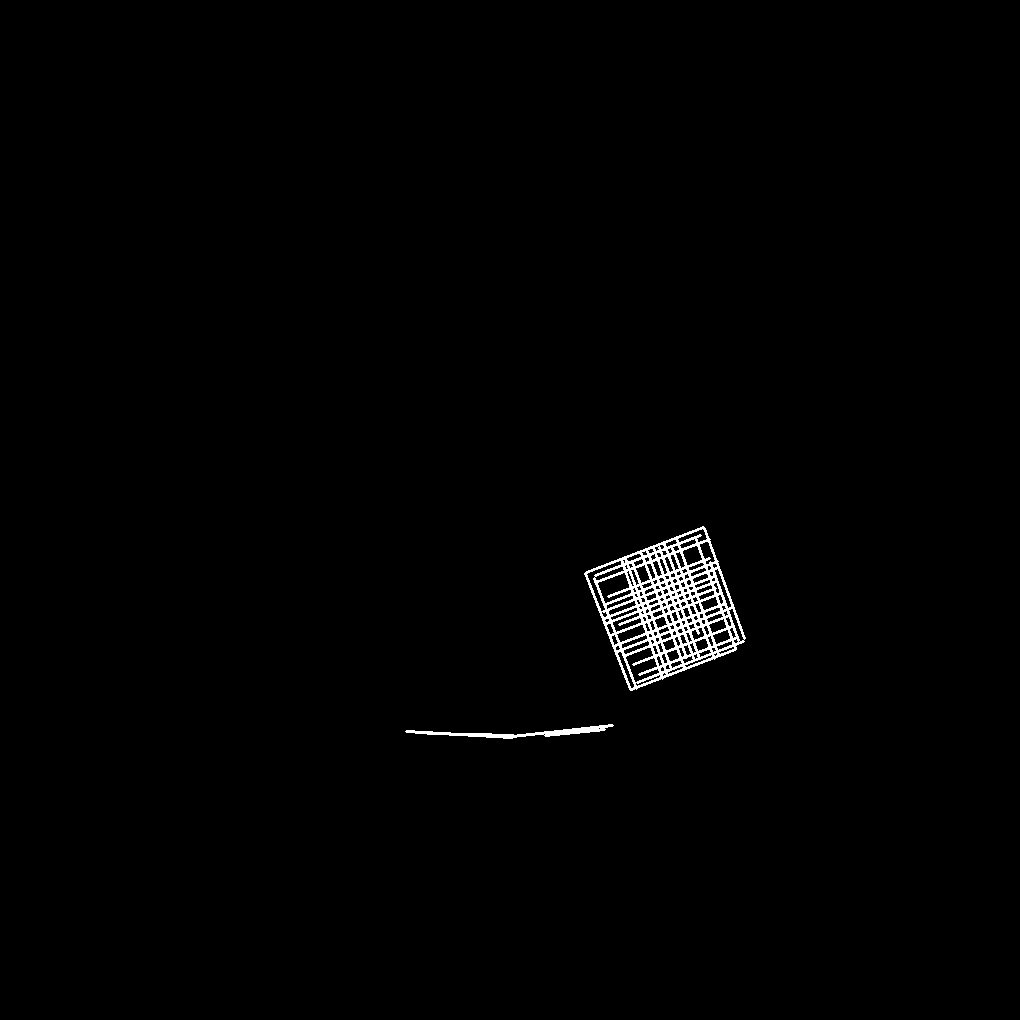

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(padded_edges, 1, np.pi / 180, threshold=30, minLineLength=50, maxLineGap=50)

# Create a black mask image
mask = np.zeros_like(padded_edges)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

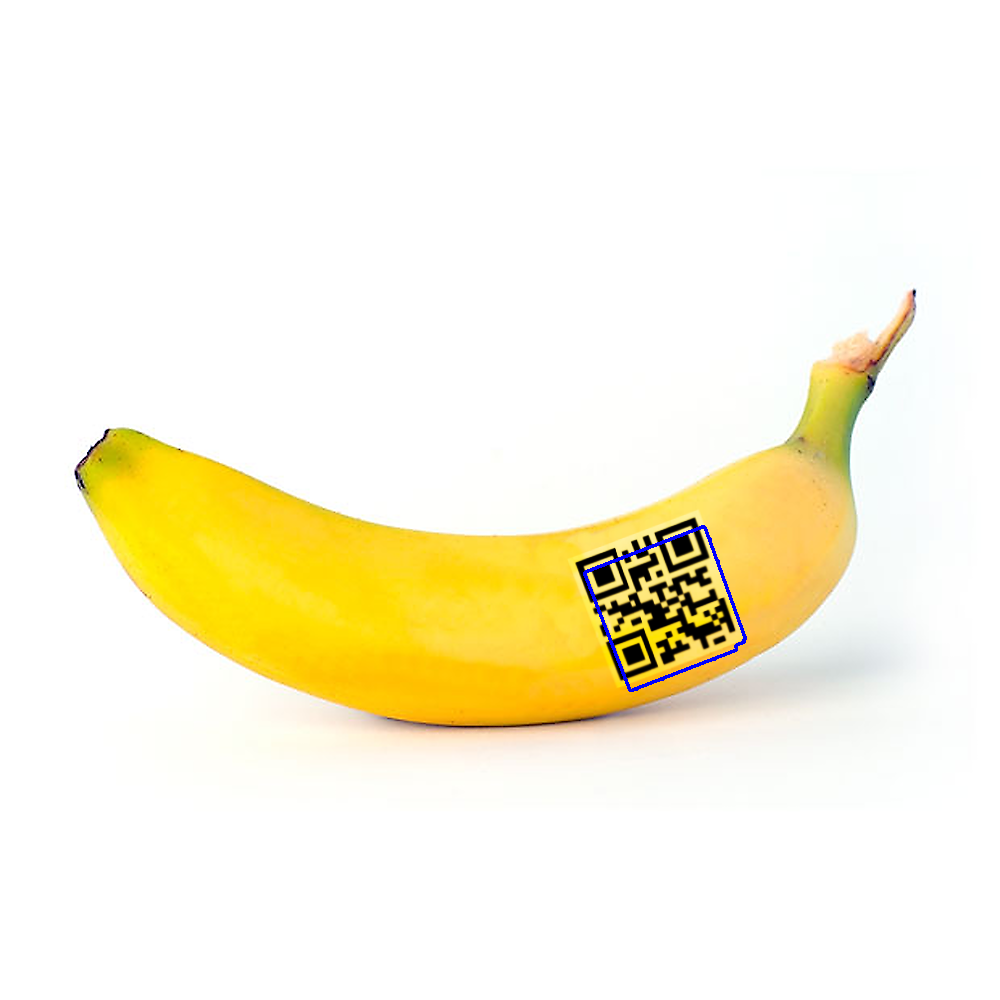

In [ ]:
# find contours in the mask
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter squares
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour
            # Draw the approximated contour in green
            #cv2.polylines(img, [approx], isClosed=True, color=(0, 255, 0), thickness=2)

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)


cv2_imshow(img)

# Testcase 15 (Wara2a ma2to3a)


# Testcase 16 (Big QR)

# Noise detection

In [ ]:
def detect_noise_type(image_gray, threshold=0.05):
    # Calculate the standard deviation of pixel intensities
    std_dev = np.std(image_gray)

    # Check for Gaussian noise based on standard deviation
    if std_dev < threshold * 255:
        return "Gaussian Noise"

    # Calculate the histogram of pixel intensities
    histogram = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

    # Check for salt and pepper noise based on histogram spikes
    peak_ratio = np.sum(histogram[:10]) + np.sum(histogram[-10:])
    total_pixels = image_gray.shape[0] * image_gray.shape[1]
    if peak_ratio / total_pixels > 0.01:
        return "Salt and Pepper Noise"

    # Check for speckle noise based on local variance
    variance = cv2.Laplacian(image_gray, cv2.CV_64F).var()
    if variance < threshold:
        return "Speckle Noise"

    return "No Recognizable Noise"


# Example usage:
image_path = 'images/01-Getting-started.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

noise_type = detect_noise_type(gray_image)
print("Detected Noise Type:", noise_type)
